In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('F:\\Machine learning\\Course\\2 Credit Card Fraud Detection\\data\\split\\train.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,119191.0,2.052427,-0.133236,-1.740621,0.277935,0.337999,-0.826933,0.334629,-0.227039,0.267655,...,-0.006518,0.121300,0.037733,-0.356498,0.147822,0.569149,-0.103929,-0.091958,8.73,0
1,71750.0,1.220356,-0.159191,-0.444349,-0.094437,0.104457,-0.345790,0.170867,-0.094996,0.187572,...,-0.088775,-0.364654,-0.140851,-0.707308,0.415661,1.087767,-0.102532,-0.008335,59.95,0
2,151977.0,0.892824,-1.440698,-0.637940,3.912871,0.099291,2.433288,-0.308891,0.603227,-0.113826,...,0.484969,0.487304,-0.122694,-0.598803,-0.594563,0.062841,-0.033426,0.038254,460.65,0
3,55709.0,-3.146021,2.247634,0.901397,0.146162,-2.109360,-0.148312,-1.533191,2.073663,0.499394,...,0.050567,-0.037019,0.107000,0.392857,0.303597,0.379544,-0.148990,0.074965,4.78,0
4,66654.0,1.194996,-0.007495,0.301285,0.750199,-0.297494,-0.405836,0.060410,-0.150482,0.400860,...,-0.234931,-0.545566,-0.089418,-0.064036,0.527305,0.294221,-0.025980,0.015637,44.31,0


In [3]:
def chk_data(df):
    print("SHAPE".center(70, '-'))
    print('Rows:{}'.format(df.shape[0]))
    print('Columns: {}'.format(df.shape[1]))
    print(" Types ".center(70, '-'))
    print(df.dtypes)
    print("missing values".center(70, '-'))
    print(df.isnull().sum())
    print("Some statistical measures".center(70, '-'))
    print(df.describe())

chk_data(data)

--------------------------------SHAPE---------------------------------
Rows:170884
Columns: 31
------------------------------- Types --------------------------------
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
----------------------------missing values----------------------------
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0

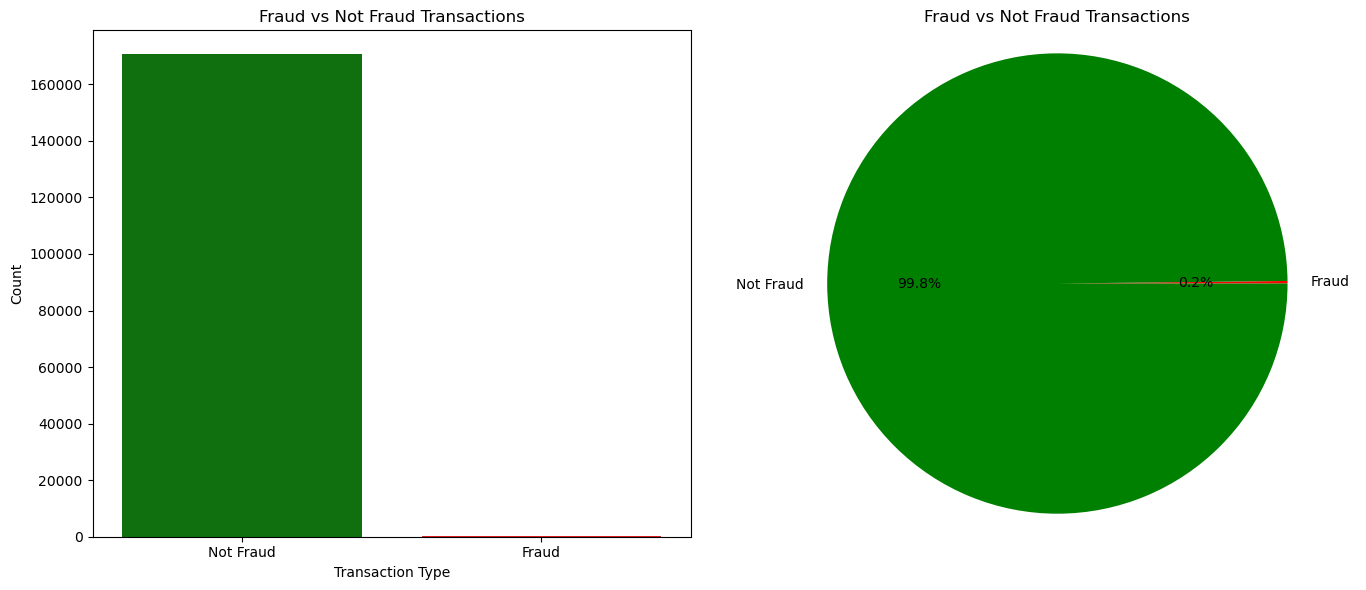

In [4]:
fraud = data[data['Class'] == 1]
not_fraud = data[data['Class'] == 0]

fraud_count = len(fraud)
not_fraud_count = len(not_fraud)

labels = ['Fraud', 'Not Fraud']
sizes = [fraud_count, not_fraud_count]
colors = ['red', 'green']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(x='Class', data=data, ax=ax1, palette=['green', 'red'])
ax1.set_xticklabels(['Not Fraud', 'Fraud'])
ax1.set_title('Fraud vs Not Fraud Transactions')
ax1.set_xlabel('Transaction Type')
ax1.set_ylabel('Count')

ax2.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
ax2.set_title('Fraud vs Not Fraud Transactions')
ax2.axis('equal') 

plt.tight_layout()
plt.show()

* Both the bar chart and pie chart show a significant class very imbalance in the dataset
* Not Fraudulent Transactions dominate the data, making up 99.8% of all transactions
* Fraudulent Transactions represent only 0.2% of the dataset
* To handle this imbalance, we will try methods like over sampling, under sampling and SMOTE

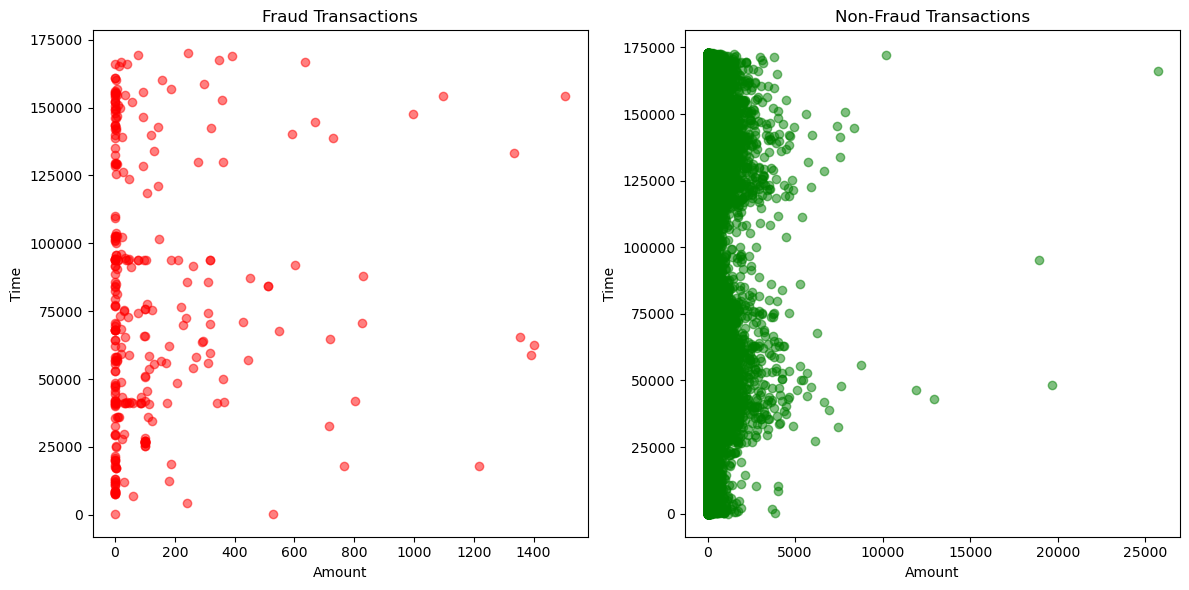

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].scatter(fraud['Amount'], fraud['Time'], color='red', alpha=0.5)
ax[0].set_title('Fraud Transactions')
ax[0].set_xlabel('Amount')
ax[0].set_ylabel('Time')

ax[1].scatter(not_fraud['Amount'], not_fraud['Time'], color='green', alpha=0.5)
ax[1].set_title('Non-Fraud Transactions')
ax[1].set_xlabel('Amount')
ax[1].set_ylabel('Time')

plt.tight_layout()

plt.show()

* Fraud transactions are generally smaller in amount and less frequent than non-fraud transactions.
* Non-fraud transactions have a much larger variation in both time and amount, while fraud transactions are mostly concentrated in specific regions (lower amounts)

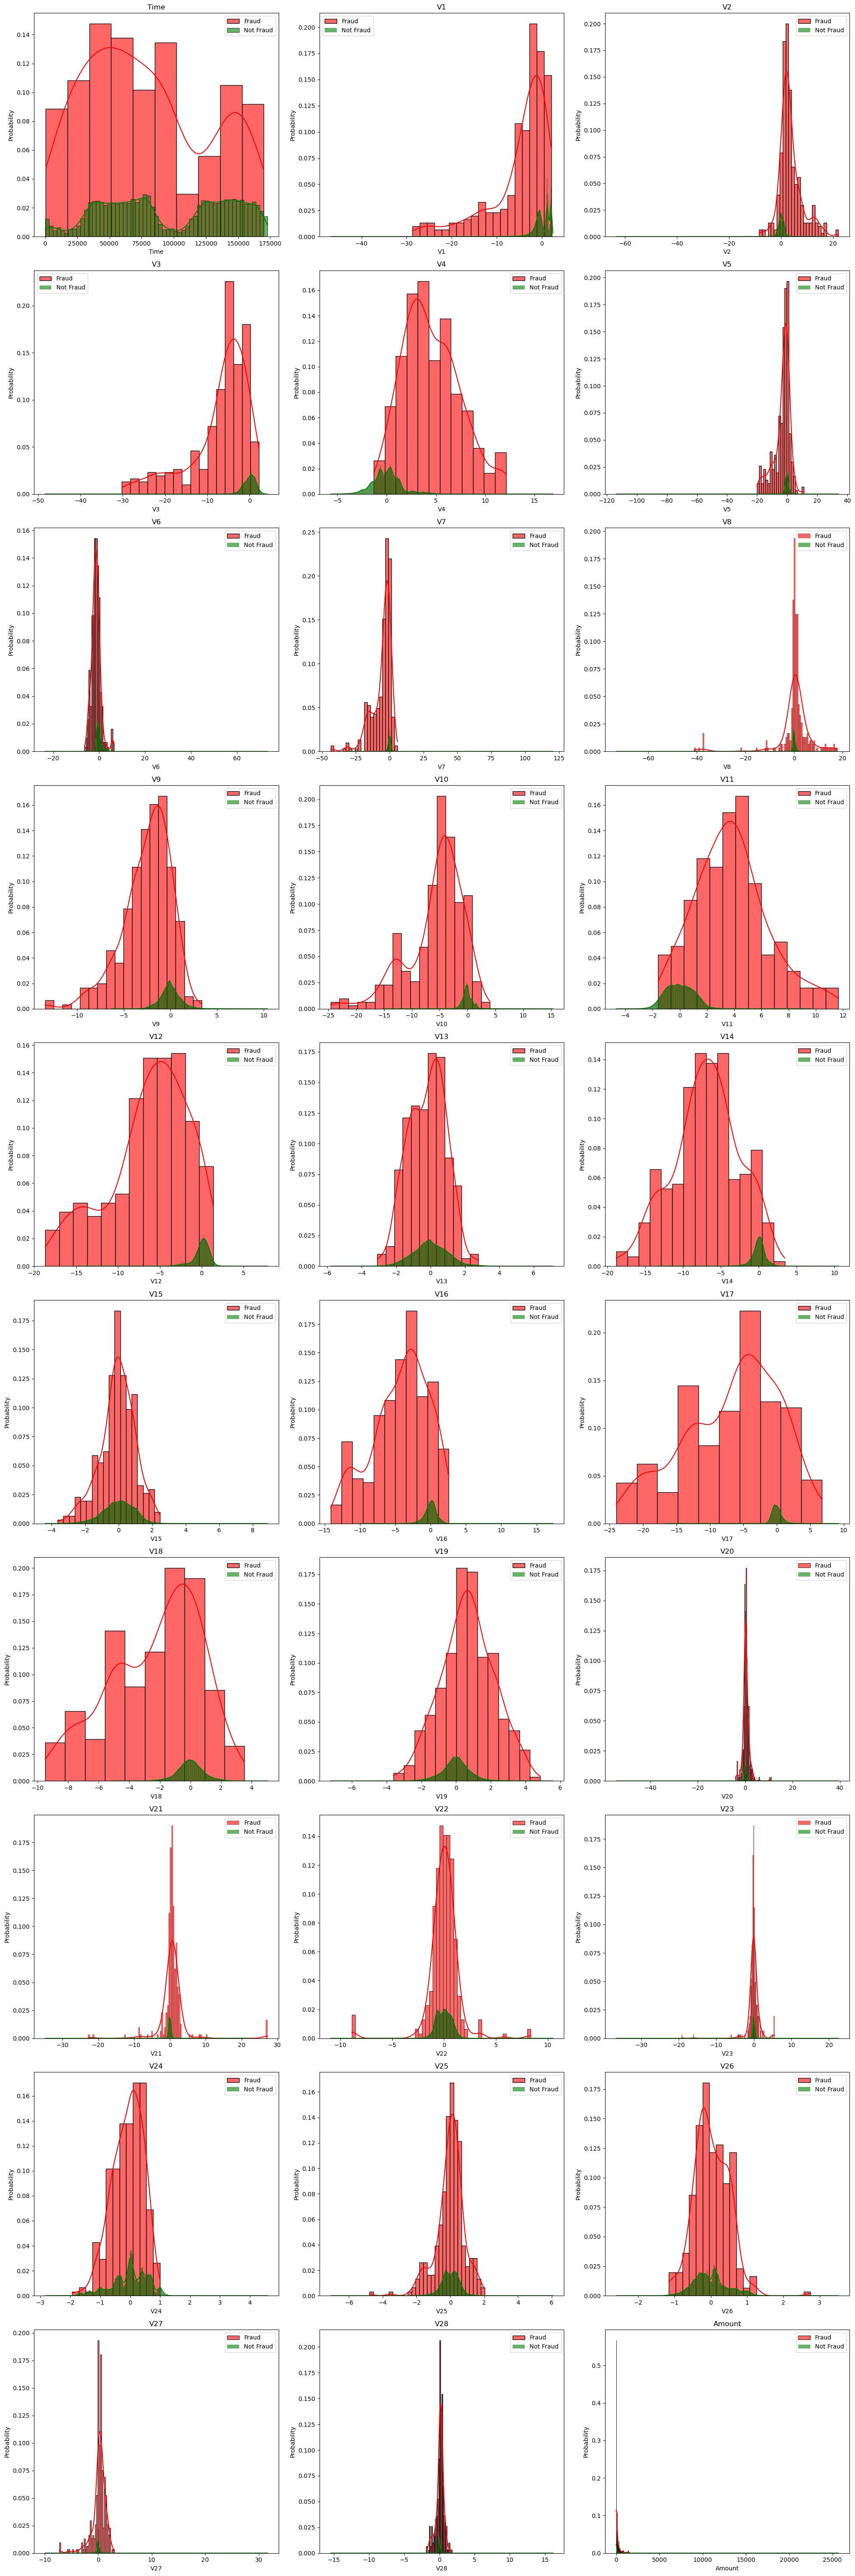

In [6]:
figure = plt.figure(figsize=(20, 60))
cols = (data.columns).to_list()

for i, col in enumerate(cols):
    if col == 'Class': 
        continue

    plt.subplot(10, 3, i + 1)
    sns.histplot(fraud[col], color='red', kde=True, stat='probability', label='Fraud', alpha=0.6)
    sns.histplot(not_fraud[col], color='green', kde=True, stat='probability', label='Not Fraud', alpha=0.6)
    
    plt.title(f'{col}')
    plt.xlabel(col)
    plt.ylabel('Probability')
    plt.legend()

plt.tight_layout()
plt.show()

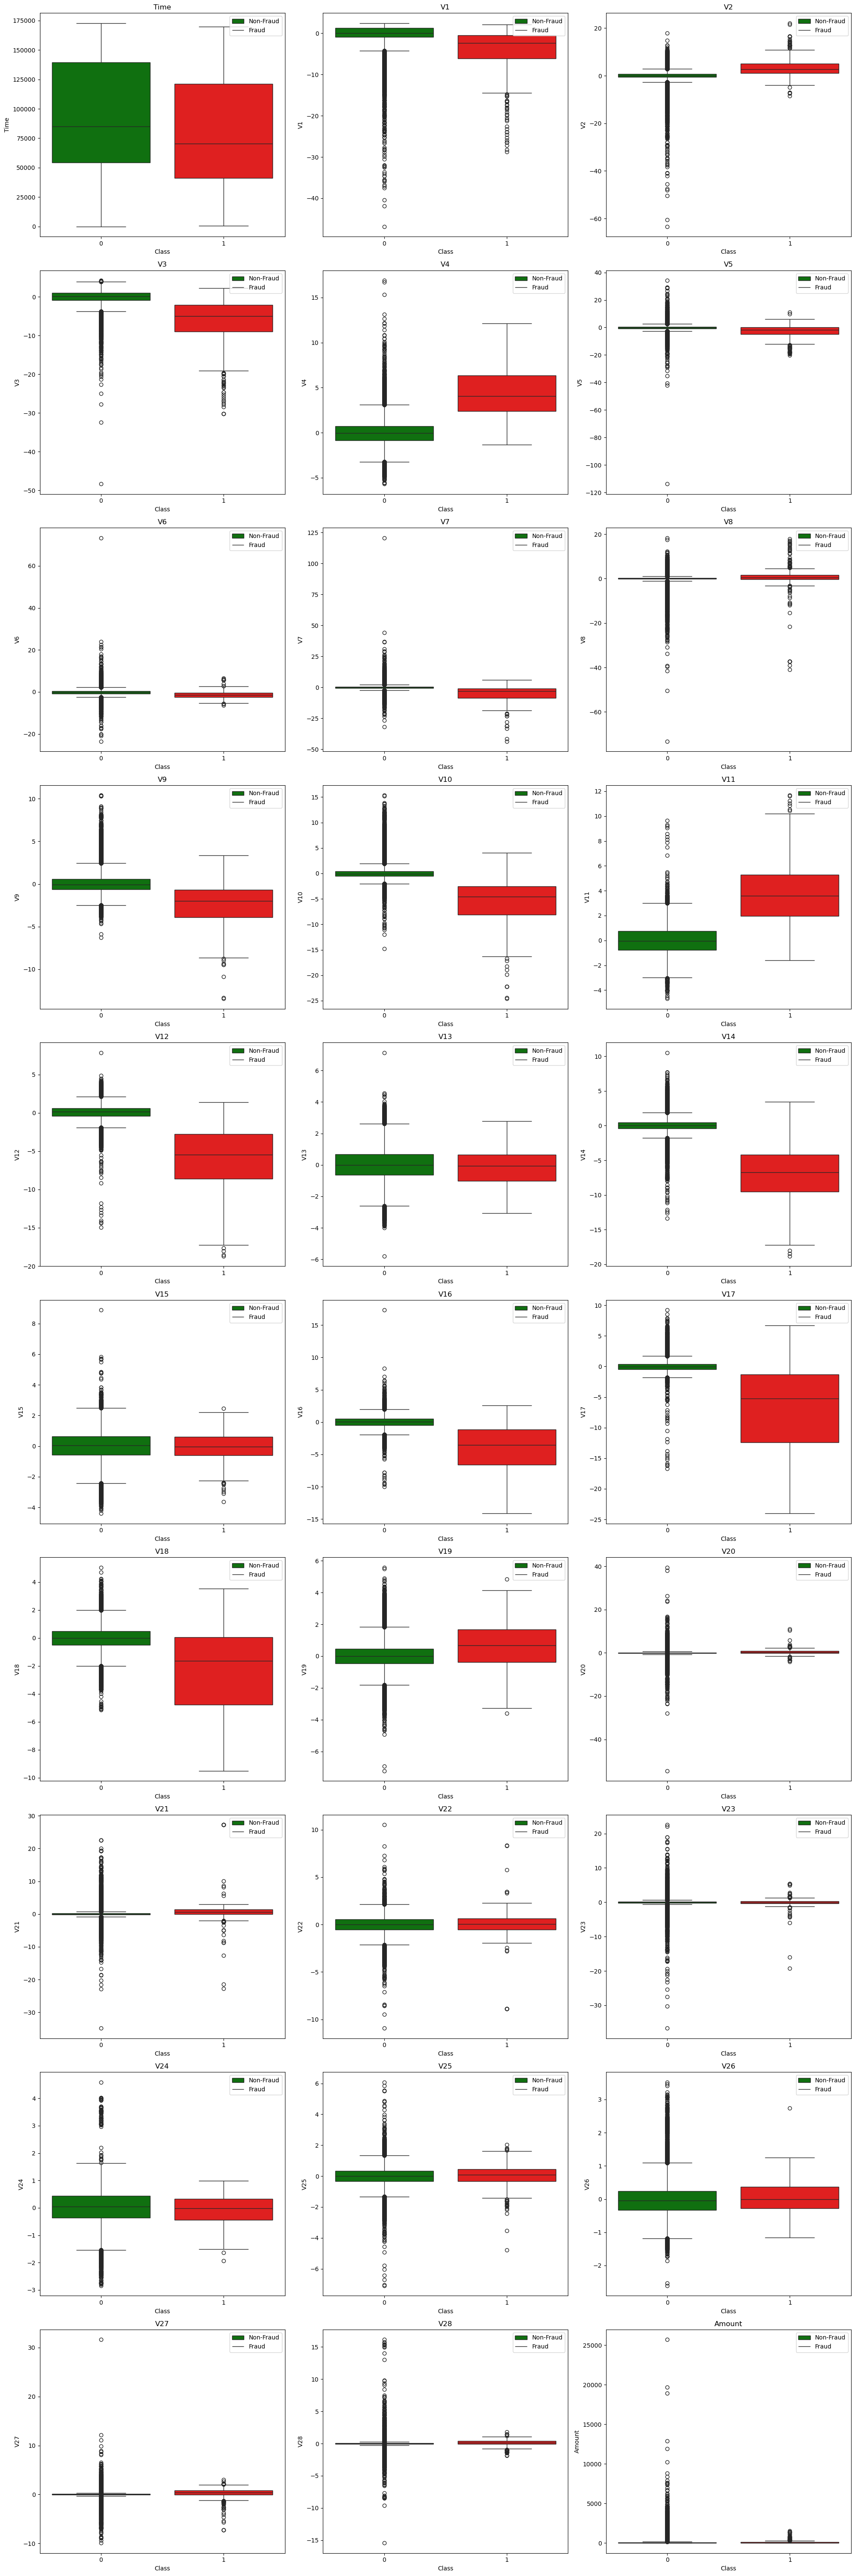

In [7]:
figure = plt.figure(figsize=(20, 60))

for i, col in enumerate(cols):
    if col == 'Class':
        continue
        
    plt.subplot(10, 3, i + 1)
    sns.boxplot(x='Class', y=col, data=data, hue='Class', palette=['green', 'red'])
    
    plt.title(col)
    plt.xlabel('Class')
    plt.ylabel(col)
    plt.legend(labels=['Non-Fraud', 'Fraud'], loc='upper right')
    
plt.tight_layout()
plt.show()

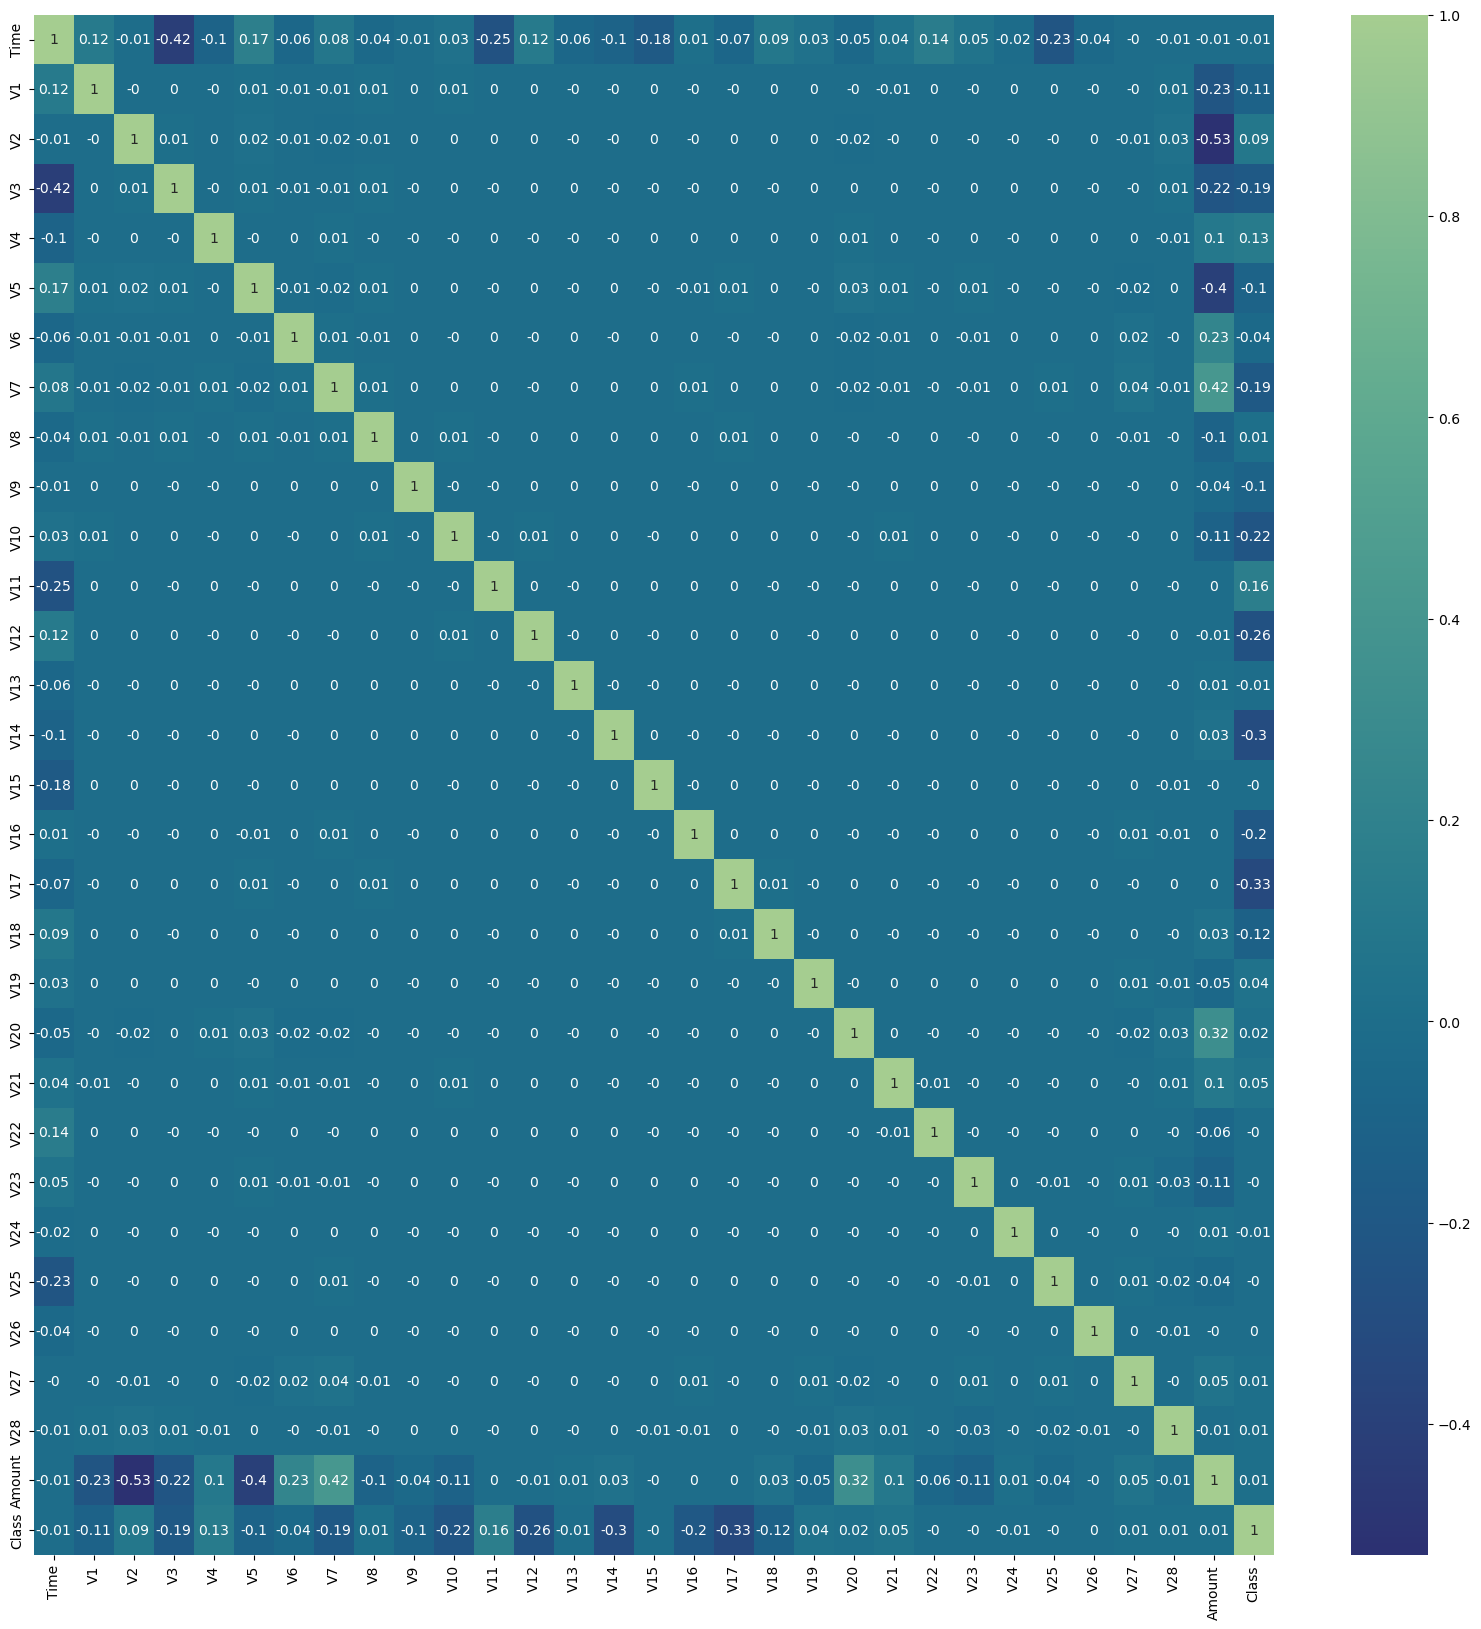

In [8]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr().round(2), annot=True, cmap='crest_r')
plt.show()

* Let's do our preprocess, modelling and evaluation on IDE